In [150]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from typing import List
from typing import Tuple
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import ClusterCentroids
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_curve, auc

df = pd.read_csv("Credit_card.csv")
label_df = pd.read_csv('Credit_card_label.csv')
df.head(30)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
5,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,NaN,2
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3


In [151]:
df.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
dtype: object

In [152]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members'],
      dtype='object')

In [153]:
#1.
from sklearn.preprocessing import LabelEncoder

class_labels = LabelEncoder()

df['Housing_type'] = class_labels.fit_transform(df['Housing_type'].values)
df['Type_Income'] = class_labels.fit_transform(df['Type_Income'].values)
df['GENDER'] = class_labels.fit_transform(df['GENDER'].values)
df['Car_Owner'] = class_labels.fit_transform(df['Car_Owner'].values)
df['Propert_Owner'] = class_labels.fit_transform(df['Propert_Owner'].values)
df['CHILDREN'] = class_labels.fit_transform(df['CHILDREN'].values)
df['EDUCATION'] = class_labels.fit_transform(df['EDUCATION'].values)
df['Marital_status'] = class_labels.fit_transform(df['Marital_status'].values)
df['Type_Occupation'] = class_labels.fit_transform(df['Type_Occupation'].values)
df['Annual_income'] = class_labels.fit_transform(df['Annual_income'].values)
df['Birthday_count'] = class_labels.fit_transform(df['Birthday_count'].values)
df['Employed_days'] = class_labels.fit_transform(df['Employed_days'].values)
df

# There wasn't really anything else I thought I could do so I just changed all the employed days to be positive.

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,1,1,1,0,60,1,1,1,1,384,955,1,0,0,0,18,2
1,5009744,0,1,0,0,88,0,1,1,1,854,818,1,1,1,0,18,2
2,5009746,0,1,0,0,88,0,1,1,1,1270,818,1,1,1,0,18,2
3,5009749,0,1,0,0,115,0,1,1,1,854,818,1,1,1,0,18,2
4,5009752,0,1,0,0,88,0,1,1,1,854,818,1,1,1,0,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,115,0,1,1,1,1003,483,1,0,0,0,10,2
1544,5023655,0,0,0,0,72,0,2,3,1,1167,677,1,0,0,0,0,1
1545,5115992,1,1,1,2,60,3,1,1,1,888,420,1,0,0,0,10,4
1546,5118219,1,1,0,0,81,3,4,0,1,670,803,1,1,1,0,4,2


In [154]:
from statsmodels.formula.api import logit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y = df['Type_Occupation']
X = df[['Family_Members']]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [155]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [156]:
y_pred = regression.predict(X_test) 
y_pred

array([11.00047758, 11.82583894, 10.17511621, 11.82583894, 11.00047758,
       11.00047758, 11.00047758, 11.82583894, 11.82583894, 11.00047758,
        9.34975484, 11.00047758, 11.00047758, 11.00047758, 10.17511621,
       11.00047758, 11.00047758, 11.00047758, 11.00047758, 11.00047758,
       11.00047758, 11.00047758, 10.17511621, 11.00047758, 11.82583894,
       11.00047758, 11.00047758, 11.00047758, 10.17511621, 11.00047758,
       11.82583894, 11.00047758, 10.17511621, 11.00047758, 11.00047758,
       11.00047758, 11.00047758, 11.00047758, 11.00047758, 10.17511621,
       10.17511621, 11.82583894, 11.00047758, 11.00047758,  9.34975484,
       10.17511621, 11.00047758, 10.17511621, 11.00047758, 11.82583894,
       11.82583894, 11.00047758, 11.00047758, 11.00047758, 11.82583894,
       10.17511621, 10.17511621, 11.00047758, 11.00047758, 11.00047758,
       11.00047758, 11.00047758,  9.34975484, 11.00047758, 10.17511621,
       10.17511621, 11.00047758, 11.82583894, 11.00047758, 11.00

In [157]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [158]:
model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=42)

In [159]:
y_pred = model.predict(X_test)

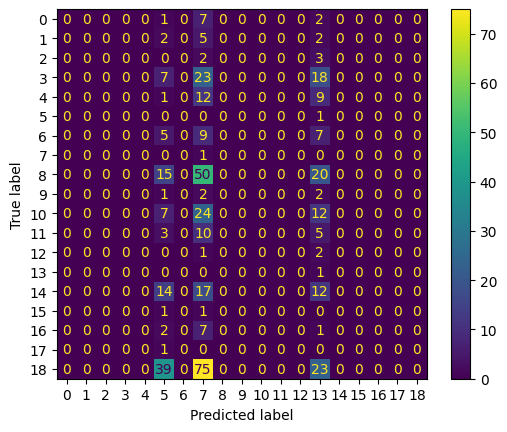

In [160]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [161]:
#2
def apply_smoteenn(X:int, y:int):
    
    smoteenn = SMOTEENN(random_state=42)
    X_resampled, y_resampled = smoteenn.fit_resample(X, y)
    return X_resampled, y_resampled

In [162]:
def train_logistic_regression(df_encoded: pd.DataFrame) -> float:
    X = df.drop(columns=['Car_Owner', 'Ind_ID'])
    y = df['Car_Owner']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_resampled, y_train_resampled = apply_smoteenn(X_train, y_train)

    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train_resampled, y_train_resampled)

    y_pred = log_reg.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return accuracy, report
accuracy, report = train_logistic_regression(df)
print(accuracy)
print(report)

0.6483870967741936
              precision    recall  f1-score   support

           0       0.70      0.64      0.67       174
           1       0.59      0.65      0.62       136

    accuracy                           0.65       310
   macro avg       0.65      0.65      0.65       310
weighted avg       0.65      0.65      0.65       310



/home/linuxbrew/.linuxbrew/Cellar/jupyterlab/4.2.5/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [163]:
def find_optimal_k(df: pd.DataFrame, 
                   target_col: str, 
                   k_range: Tuple[int, int] = (1, 21), 
                   test_size: float = 0.2, 
                   random_state: int = 42) -> float:

    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    X_train_resampled, y_train_resampled = apply_smoteenn(X_train, y_train)
    best_k = 0
    best_score = 0
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=((2*k)+1))
        knn.fit(X_train_resampled, y_train_resampled)
        score = knn.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score

    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train_resampled, y_train_resampled)

    y_pred = knn.predict(X_test)
    y_probs = knn.predict_proba(X_test)[:, 1]
    
    test_accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    return best_k, test_accuracy, conf_matrix, class_report, y_test, y_probs

best_k, test_accuracy, conf_matrix, class_report, y_test, y_probs = find_optimal_k(df, target_col='Car_Owner')

print(f"Optimal k: {best_k}")
print(f"Test Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Optimal k: 1
Test Accuracy: 0.5258064516129032
Confusion Matrix:
[[88 86]
 [61 75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.51      0.54       174
           1       0.47      0.55      0.51       136

    accuracy                           0.53       310
   macro avg       0.53      0.53      0.52       310
weighted avg       0.54      0.53      0.53       310



In [ ]:
#I chose to do oversampling on the fact that I thought it would simplify the imformation even though the precision was not that good. 
#There was not a large effect on my KNN and logostic regression.

Optimal k: 1
Test Accuracy: 0.5258064516129032
Confusion Matrix:
[[88 86]
 [61 75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.51      0.54       174
           1       0.47      0.55      0.51       136

    accuracy                           0.53       310
   macro avg       0.53      0.53      0.52       310
weighted avg       0.54      0.53      0.53       310



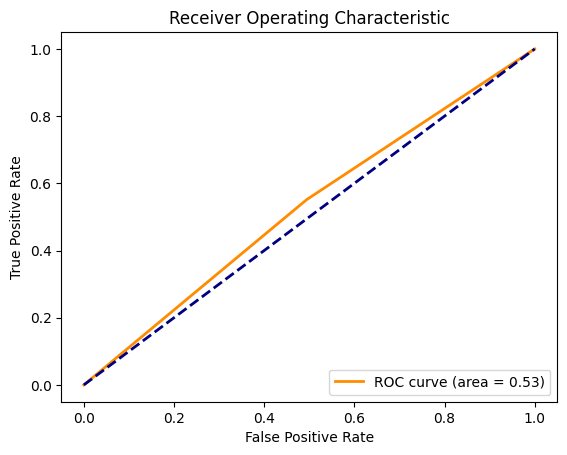

ROC AUC: 0.5286088573360379


In [164]:
#3
def plot_roc_curve(y_test: np.ndarray, y_probs: np.ndarray) -> float:
    
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    
    return roc_auc


best_k, test_accuracy, conf_matrix, class_report, y_test, y_probs = find_optimal_k(df, target_col='Car_Owner')

print(f"Optimal k: {best_k}")
print(f"Test Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

roc_auc = plot_roc_curve(y_test, y_probs)
print(f"ROC AUC: {roc_auc}")

In [165]:
#4
def train_evaluate_svm(df: pd.DataFrame, target_column: str = 'Car_Owner') -> None:
    X = df.drop(['Ind_ID', target_column], axis=1)
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    classifier = SVC(kernel='linear', random_state=42)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_rep)
train_evaluate_svm(df)
#The peformance was not that bad.

Accuracy: 0.6817
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       262
           1       0.66      0.57      0.61       203

    accuracy                           0.68       465
   macro avg       0.68      0.67      0.67       465
weighted avg       0.68      0.68      0.68       465



In [ ]:
#5
#Outlier detection is a way to detect data poits that are far away from the average. There are multiple methods that you can us for
#outlier detection inluding the Z-Method, IQR technique, and the clustering method.

In [68]:
%pip install imblearn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /home/linuxbrew/.linuxbrew/Cellar/jupyterlab/4.2.5/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
